# Modelo de propensión de pago de primas

* Modelo con idea concepto para prueba de herramienta dimensional insight 7.0

* Se validan desempeño y funcionalidad de librerías, interacción de gráficos y facilidad de conexión con DB y variables reales.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pylab import *
import seaborn as sns
import pandas as pd
from scipy import stats
import csv

In [2]:
df = pd.read_csv("Emicobsin_completo_2018.csv", sep = ",", encoding = "ISO-8859-1")
df = df.fillna(0)
df.head()

,Nombre Director,Mes Contable,Emitida,Pagada,Devengada,Siniestros,Docs,Emitida Acumulada,Pagada Acumulada,Devengada Acumulada,Siniestros Acumulada,Docs Acumulados
0,JERRY T. O HEA,2018-01,538292875.7,323263784.7,300193126.4,132930719.5,19300,5.382929e+08,3.232638e+08,3.001931e+08,132930719.5,19300
1,JERRY T. O HEA,2018-02,276759161.6,286109815.7,270398485.0,141718986.6,17150,8.150520e+08,6.093736e+08,5.705916e+08,274649706.1,36450
2,JERRY T. O HEA,2018-03,298684055.7,274638604.3,295751764.6,324129412.9,18128,1.113736e+09,8.840122e+08,8.663434e+08,598779119.0,54578
3,JERRY T. O HEA,2018-04,331100754.3,392767205.1,286279239.2,170254339.3,16445,1.444837e+09,1.276779e+09,1.152623e+09,769033458.3,71023
4,JERRY T. O HEA,2018-05,305097829.8,267392998.5,296981889.6,183180070.3,18089,1.749935e+09,1.544172e+09,1.449605e+09,952213528.6,89112


C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


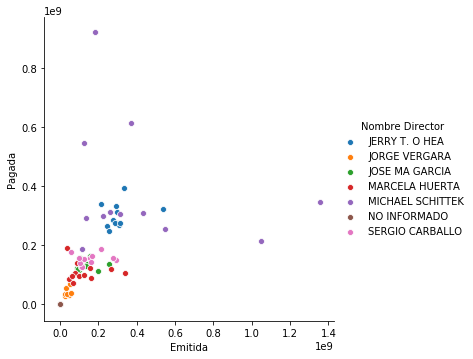

In [3]:
sns.pairplot(x_vars=['Emitida'], y_vars=['Pagada'], data=df, hue="Nombre Director", size=5)

In [4]:
df2 = df.loc[df['Nombre Director'] == 'MICHAEL SCHITTEK']

C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


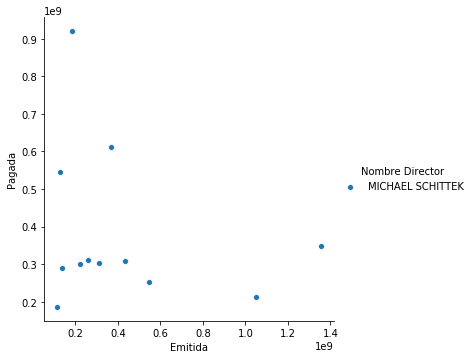

In [5]:
sns.pairplot(x_vars=['Emitida'], y_vars=['Pagada'], data=df2, hue="Nombre Director", size=5)

In [6]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df2['Emitida'], df2['Pagada'])

In [7]:
r_value ** 2

0.05997515958426161

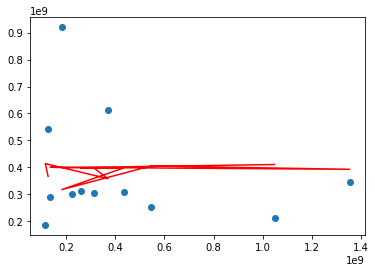

In [8]:
def predict(x):
    return slope * x + intercept

fitLine = predict(df2['Pagada'])

plt.scatter(df2['Emitida'], df2['Pagada'])
plt.plot(df2['Emitida'], fitLine, c='r')
plt.show()